# Program untuk menghilangkan noise pada data suara (Audio)

Nama : Khairuramdhani

NIM  : 235150300111035

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter
from scipy.io import wavfile
import sounddevice as sd
import os

### Memasukkan Parameter

In [2]:

fs        = 48000     # Sampling rate (Hz)
duration  = 10        # Durasi Perekaman (s)
noise_amp = 0.05      # Noise amplitude

fc        = 1000      # Cutoff frequency (Hz)
N         = 100       # Filter order
numtaps   = N + 1     # Total number of taps

File_audio_sebelum_difilter = "Audio_sebelum_difilter.wav"
File_audio_setelah_ditambahkan_noise    = "Audio_setelah_ditambahkan_noise.wav"
File_audio_setelah_difilter = "Audio_setelah_difilter.wav"

### Memeriksa File Audio (Jika belum ada, maka melakukan rekaman)

In [3]:
if not os.path.exists(File_audio_sebelum_difilter):
    print(f"Mulai melakukan perekaman {duration}s…")
    rec = sd.rec(int(duration * fs),
                 samplerate=fs,
                 channels=1,
                 dtype='float32')
    sd.wait()
    wavfile.write(File_audio_sebelum_difilter,
                  fs,
                  (rec.flatten() * np.iinfo(np.int16).max).astype(np.int16))
    print(f"File tersimpan: {File_audio_sebelum_difilter}")
else:
    print(f"File sudah ada, menggunakan: {File_audio_sebelum_difilter}")

Mulai melakukan perekaman 10s…
File tersimpan: Audio_sebelum_difilter.wav


### Membaca File Audio dan Melakukan Normalisasi

In [4]:
_, data_int = wavfile.read(File_audio_sebelum_difilter)
data = data_int.astype(np.float32) / np.iinfo(np.int16).max


### Menambahkan Noise

In [5]:
noisy = data + noise_amp * np.random.randn(len(data))
wavfile.write(File_audio_setelah_ditambahkan_noise,
              fs,
              (noisy * np.iinfo(np.int16).max).astype(np.int16))
print(f"Tersimpan: {File_audio_setelah_ditambahkan_noise}")

Tersimpan: Audio_setelah_ditambahkan_noise.wav


### Mendesain Filter FIR LPF Dengan Window Hamming

In [6]:
cutoff    = fc / (fs / 2)
fir_coeff = firwin(numtaps, cutoff=cutoff, window='hamming')

### Menerapkan Filter FIR LPF pada Audio

In [7]:
telah_difilter = lfilter(fir_coeff, 1.0, noisy)
wavfile.write(File_audio_setelah_difilter,
              fs,
              (telah_difilter * np.iinfo(np.int16).max).astype(np.int16))
print(f"Tersimpan: {File_audio_setelah_difilter}")

Tersimpan: Audio_setelah_difilter.wav


### Plot Respon Frekuensi Filter

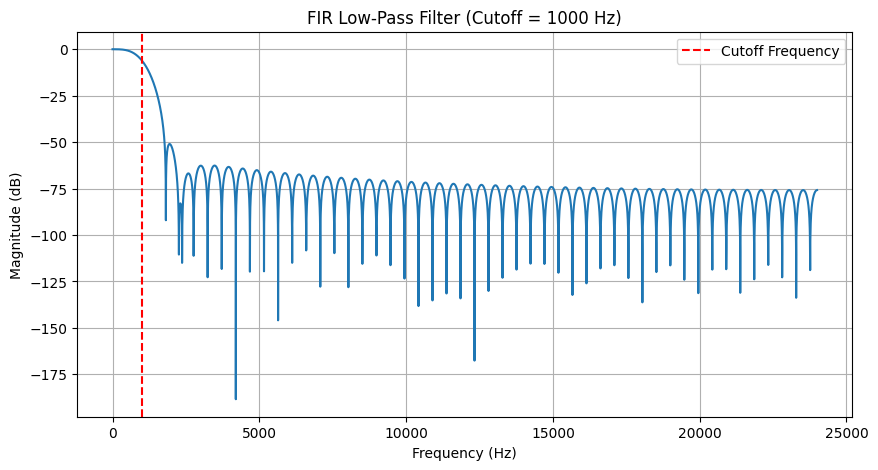

In [8]:
w, h = freqz(fir_coeff, worN=8000)
frequencies = w * fs / (2 * np.pi)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, 20 * np.log10(np.abs(h)))
plt.title(f'FIR Low-Pass Filter (Cutoff = {fc} Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.axvline(fc, color='red', linestyle='--', label='Cutoff Frequency')
plt.legend()
plt.show()

### Menampilkan Sinyal Sebelum, Ketika, dan Sesudah Diberi Noise

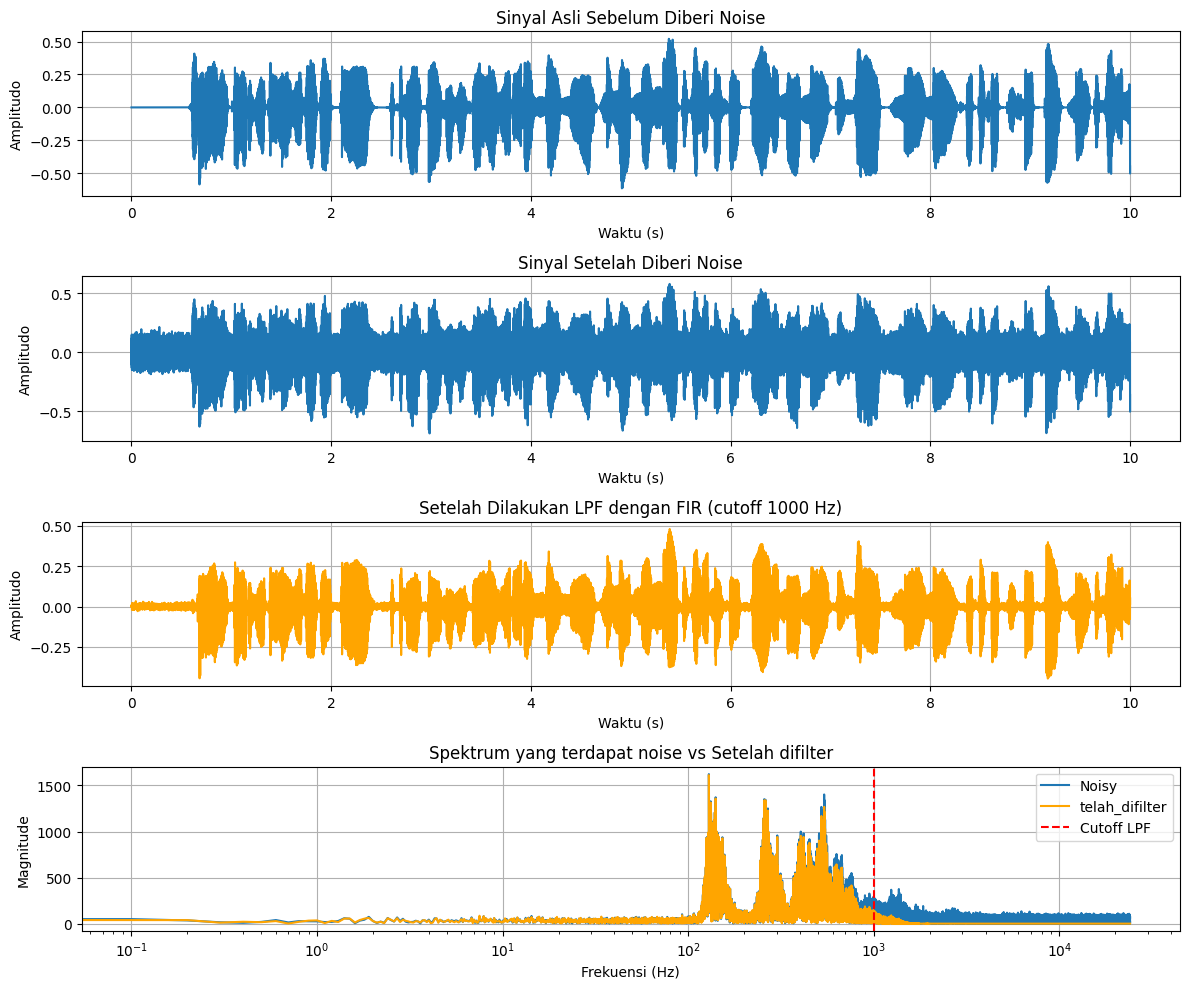

In [10]:
t2     = np.arange(len(data)) / fs
f_axis2 = np.fft.rfftfreq(len(t2), 1/fs)

plt.figure(figsize=(12, 10))

plt.subplot(4,1,1)
plt.plot(t2, data)
plt.title('Sinyal Asli Sebelum Diberi Noise')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(t2, noisy)
plt.title('Sinyal Setelah Diberi Noise')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(t2, telah_difilter, color='orange')
plt.title(f'Setelah Dilakukan LPF dengan FIR (cutoff {fc} Hz)')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid(True)

plt.subplot(4,1,4)
plt.semilogx(f_axis2, np.abs(np.fft.rfft(noisy)),    label='Noisy')
plt.semilogx(f_axis2, np.abs(np.fft.rfft(telah_difilter)), label='telah_difilter', color='orange')
plt.axvline(fc, color='red', linestyle='--', label='Cutoff LPF')
plt.title('Spektrum yang terdapat noise vs Setelah difilter')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()